In [1]:
import utils_loc as ut
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import try_all_threshold
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

import tensorflow as tf
#from tensorflow.keras.models import Model

2022-06-24 23:17:57.510340: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/erick/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-06-24 23:17:57.510372: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
DATADIR1 = '../../../_DATA_/_DATA/ORIGINAL_GOLD/Original'
DATADIR2 = '../../../_DATA_/_DATA/ORIGINAL_GOLD/GOLD'
TESTDIR = '../../../_DATA_/_DATA/ORIGINAL'
OUTDIR = '../../../_DATA_/_DATA/RESULTADOS'

In [3]:
proportion = 1.77777777778 # 16:9 , aplicada na altura
k = 5#k*32 menor dimensão da imagem (arrendondada)
IMG_CHANNELS = 3
batch_size = 5
save_model = True

height = int(np.around((k * proportion), decimals=0).astype('int') * 32) # too low can cause dimension error and must be divisible by 32
width = int(k * 32)# too low can cause dimension error and must be divisible by 32
IMG_WIDTH_HEIGHT = max(height, width)

original, original_files_names = ut.read_imgs(path=DATADIR1, height=height, width=width, resize = True, mode = 'RGB', squared = True, square_color=(255,255,255), show = False, write=False, write_path='original')
gold_masks, gold_files_names = ut.read_imgs(path=DATADIR2, height=height, width=width, resize = True, mode = 'GRAYSCALE', squared = True, square_color=(0,0,0), show = False, write=False, write_path='gold_masks')
test, test_files_names = ut.read_imgs(path=TESTDIR, height=height, width=width, resize = True, mode = 'RGB', squared = True, square_color=(255,255,255), show = False, write=False, write_path='test')

100%|██████████| 66/66 [00:00<00:00, 97.01it/s] 


In [4]:
#model = tf.keras.models.load_model(f'models/model+aug-k={k}.h5')
model = tf.keras.models.load_model(f'models/model-k={k}.h5')

X_train = []
Y_train = []
X_test = []
for image, mask in ut.concatenate2_2_it(original, gold_masks):

        X_train.append(image.astype('float32') / 255.0)
        #plt.imshow(X_train[-1], cmap='gray')
        #plt.show()
        
        aux = mask.astype('float32') / 255.0    
        Y_train.append( np.around(aux, decimals=0).astype('uint8') )
        #plt.imshow(Y_train[-1], cmap='gray')
        #plt.show()

for test_img in test:

        X_test.append(test_img.astype('float32') / 255.0)
        #plt.imshow(X_test[-1], cmap='gray')
        #plt.show()

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

2022-06-24 23:18:05.335268: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/erick/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-06-24 23:18:05.335318: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-24 23:18:05.335343: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lasid30): /proc/driver/nvidia/version does not exist
2022-06-24 23:18:05.335932: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


3/3 [==============================] - 7s 2s/step


Original file name - 27.jpg


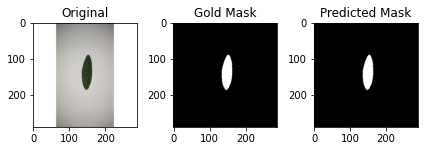

Original file name - 24.jpg


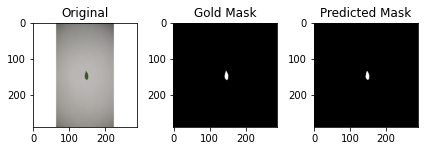

Original file name - 11.jpg


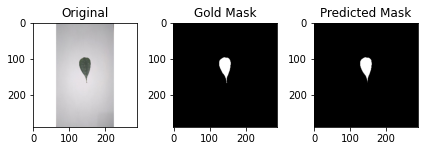

Original file name - 07.jpg


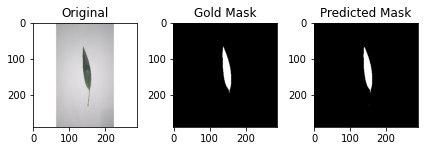

Original file name - 34.jpg


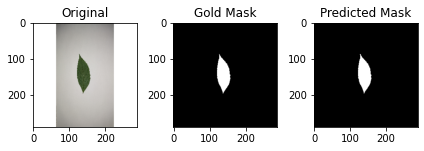

Original file name - 33.jpg


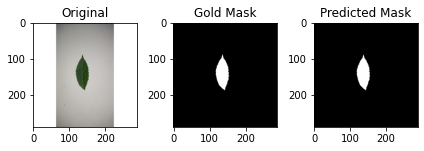

Original file name - 41.jpg


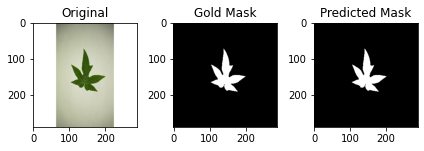

Original file name - 43.jpg


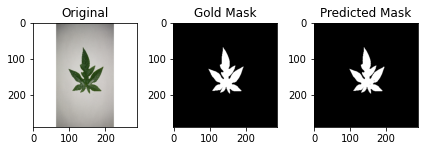

Original file name - 06.jpg


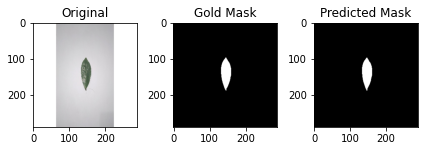

Original file name - 01.jpg


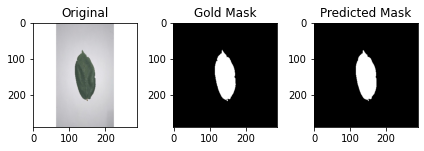

Original file name - 44.jpg


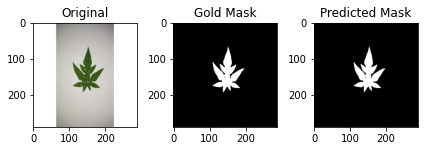

Original file name - 23.jpg


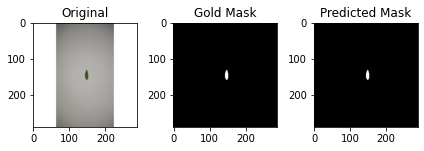

Original file name - 36.jpg


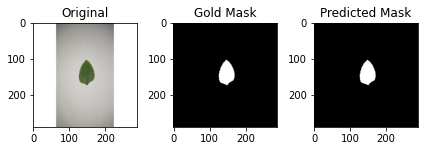

Original file name - 30.jpg


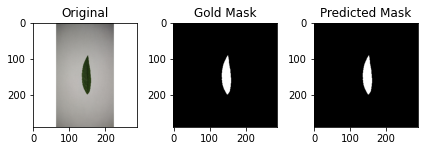

Original file name - 18.jpg


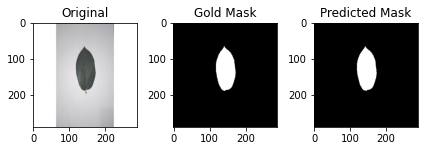

Original file name - 42.jpg


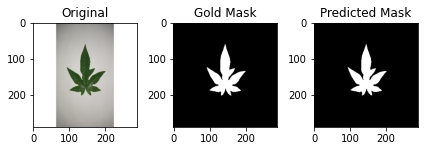

Original file name - 17.jpg


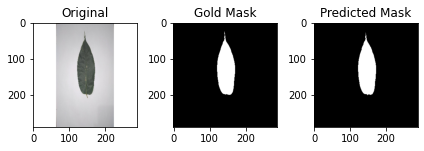

Original file name - 29.jpg


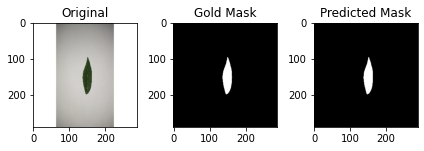

Original file name - 22.jpg


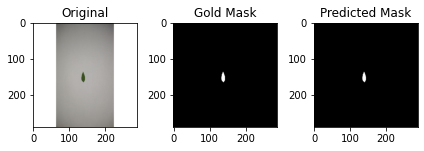

Original file name - 37.jpg


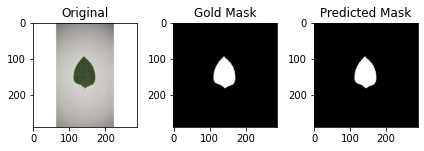

Original file name - 10.jpg


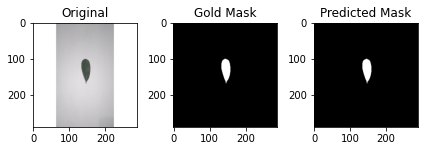

Original file name - 16.jpg


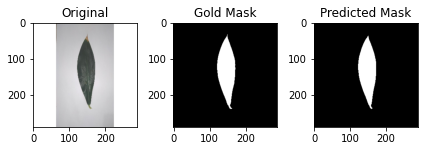

Original file name - 35.jpg


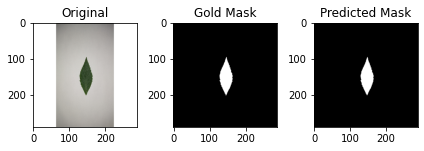

Original file name - 05.jpg


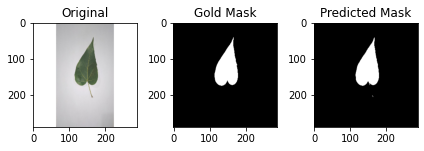

Original file name - 12.jpg


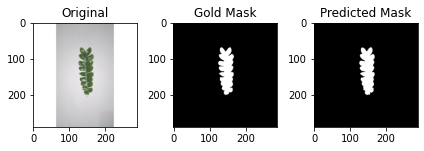

Original file name - 25.jpg


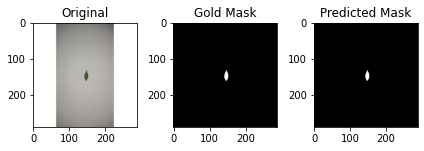

Original file name - 02.jpg


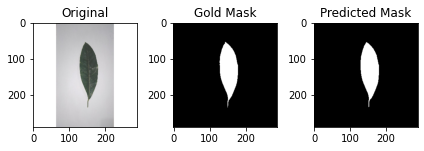

Original file name - 20.jpg


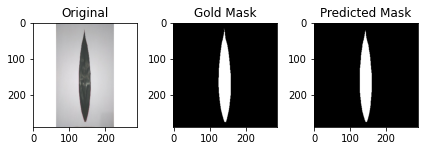

Original file name - 38.jpg


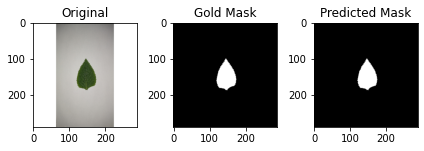

Original file name - 39.jpg


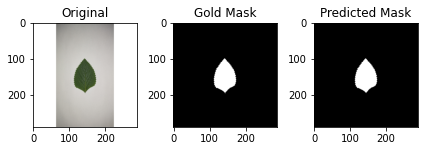

Original file name - 19.jpg


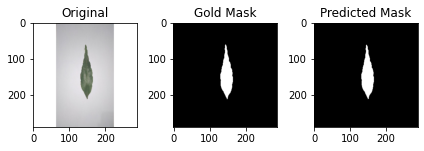

Original file name - 26.jpg


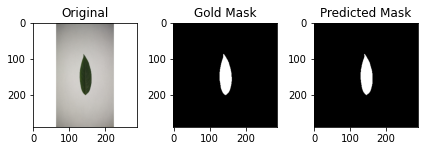

Original file name - 13.jpg


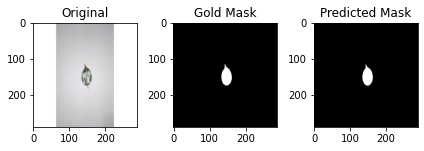

Original file name - 08.jpg


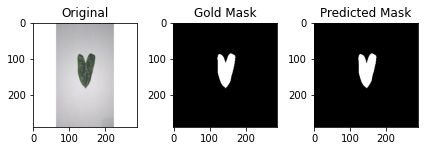

Original file name - 28.jpg


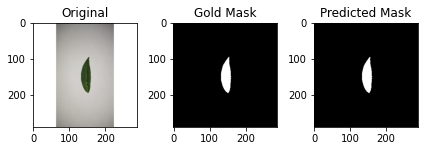

Original file name - 40.jpg


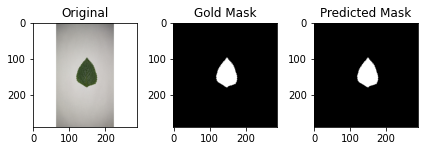

Original file name - 15.jpg


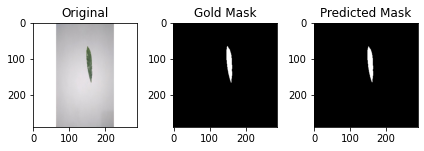

Original file name - 21.jpg


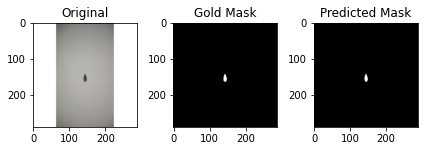

Original file name - 04.jpg


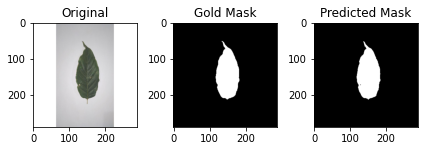

Original file name - 09.jpg


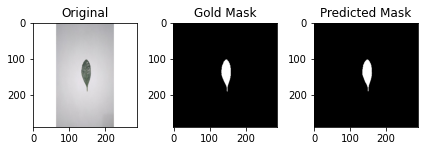

Original file name - 45.jpg


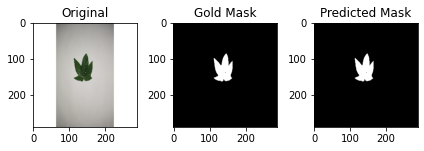

Original file name - 32.jpg


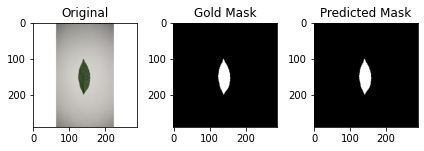

Original file name - 31.jpg


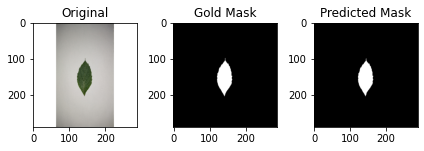

Original file name - 14.jpg


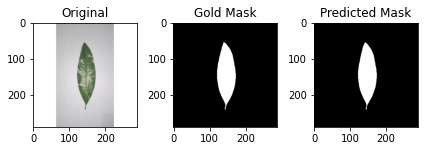

Original file name - 03.jpg


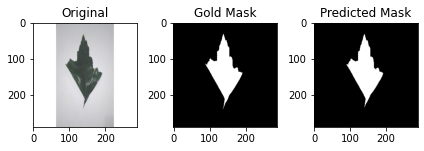

In [5]:
for i in range(len(train_predictions)):
    # making subplots
    print(f'Original file name - {original_files_names[i]}')
    fig, ax = plt.subplots(1, 3)
    # set data with subplots and plot  
    ax[0].imshow(X_train[i])
    ax[0].set_title('Original')    
    
    thresh = threshold_otsu( Y_train[i] )    
    binary = Y_train[i] > thresh
    ax[1].imshow(binary, cmap='gray')
    ax[1].set_title('Gold Mask')    
    
    grays = rgb2gray(train_predictions[i])
    thresh = threshold_otsu( grays )    
    binary = grays > thresh
    ax[2].imshow(binary, cmap='gray')
    ax[2].set_title('Predicted Mask')

    fig.tight_layout()
    
    path = os.path.join(OUTDIR, 'gold_original', original_files_names[i])
    plt.savefig(path)
    
    plt.show()

Test file name - ORIGINAL (59).jpg


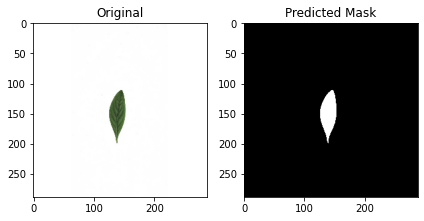

Test file name - ORIGINAL (58).jpg


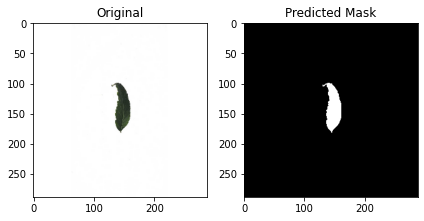

Test file name - ORIGINAL (38).jpg


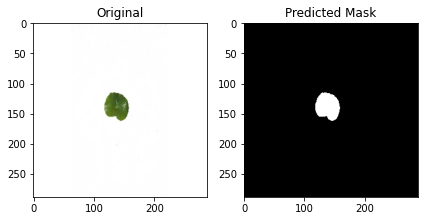

Test file name - ORIGINAL (18).jpg


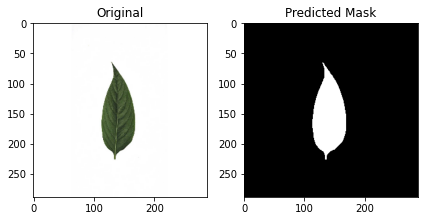

Test file name - ORIGINAL (65).jpg


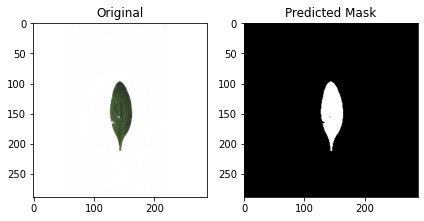

Test file name - ORIGINAL (57).jpg


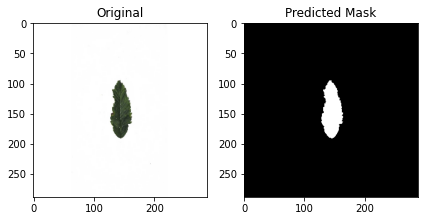

Test file name - ORIGINAL (28).jpg


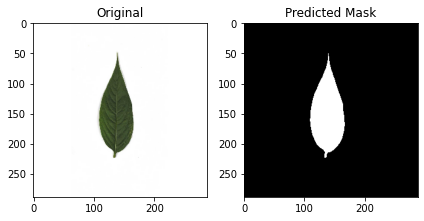

Test file name - ORIGINAL (46).jpg


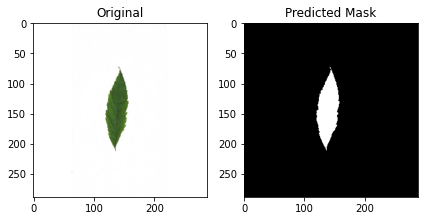

Test file name - ORIGINAL (16).jpg


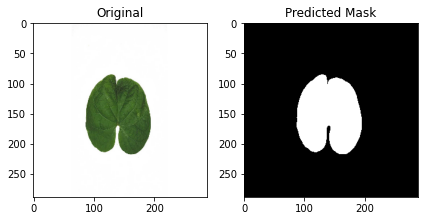

Test file name - ORIGINAL (10).jpg


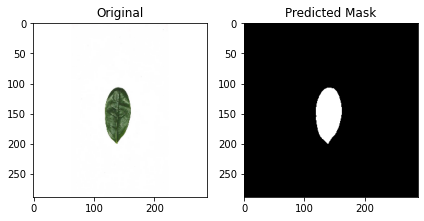

Test file name - ORIGINAL (55).jpg


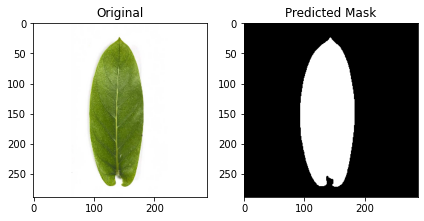

Test file name - ORIGINAL (9).jpg


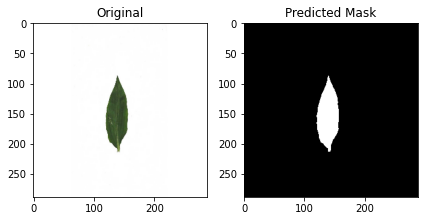

Test file name - ORIGINAL (15).jpg


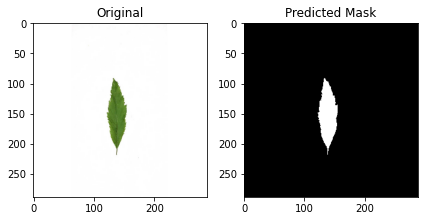

Test file name - ORIGINAL (36).jpg


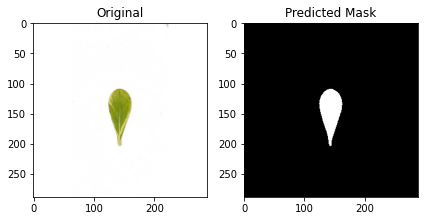

Test file name - ORIGINAL (37).jpg


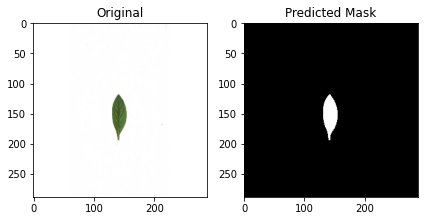

Test file name - ORIGINAL (32).jpg


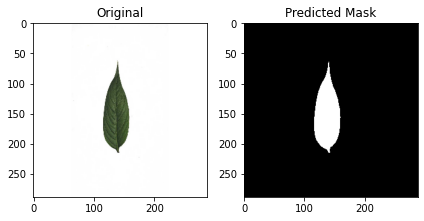

Test file name - ORIGINAL (23).jpg


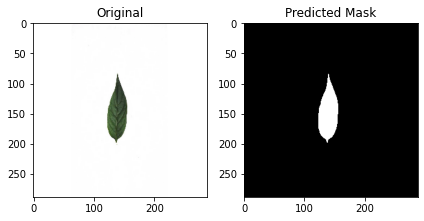

Test file name - ORIGINAL (66).jpg


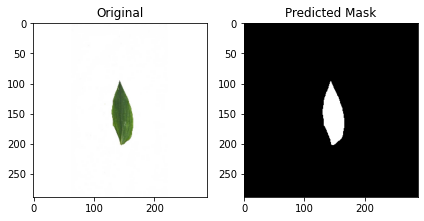

Test file name - ORIGINAL (3).jpg


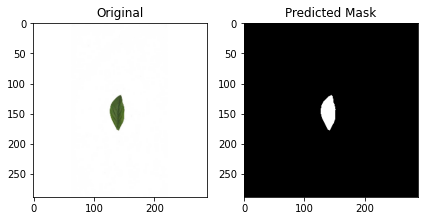

Test file name - ORIGINAL (26).jpg


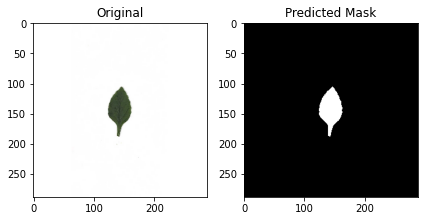

Test file name - ORIGINAL (48).jpg


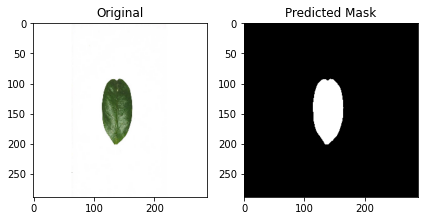

Test file name - ORIGINAL (51).jpg


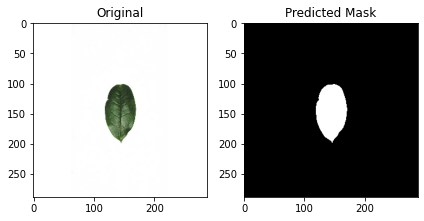

Test file name - ORIGINAL (4).jpg


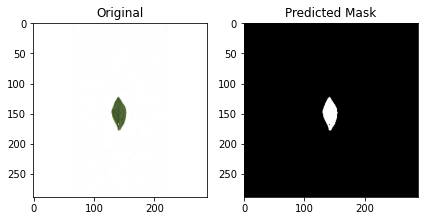

Test file name - ORIGINAL (61).jpg


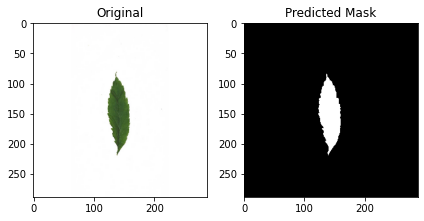

Test file name - ORIGINAL (17).jpg


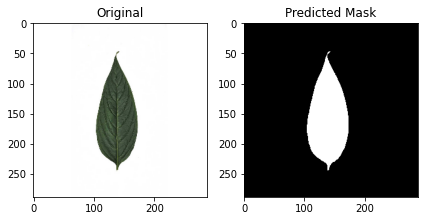

Test file name - ORIGINAL (13).jpg


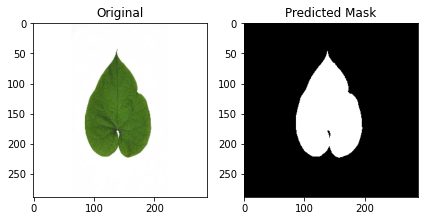

Test file name - ORIGINAL (60).jpg


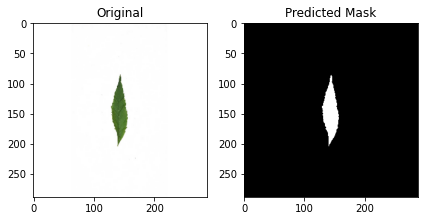

Test file name - ORIGINAL (24).jpg


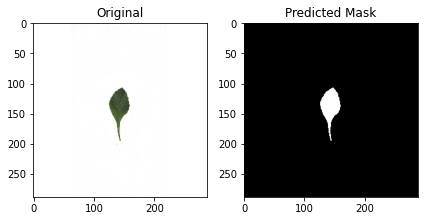

Test file name - ORIGINAL (56).jpg


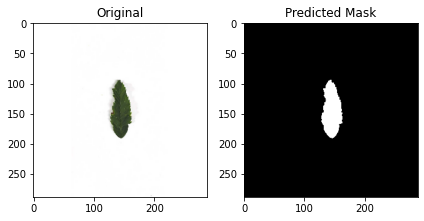

Test file name - ORIGINAL (52).jpg


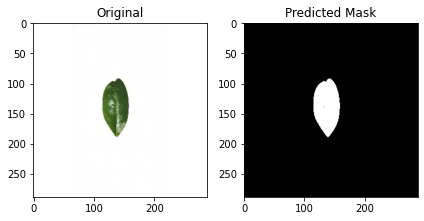

Test file name - ORIGINAL (35).jpg


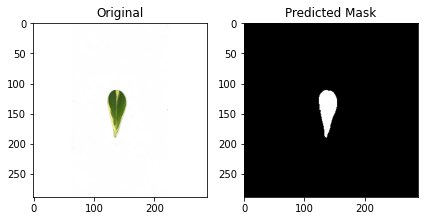

Test file name - ORIGINAL (27).jpg


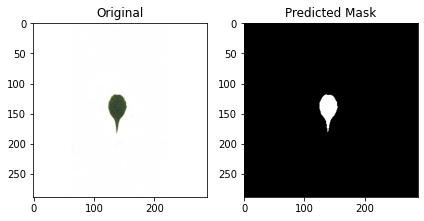

Test file name - ORIGINAL (8).jpg


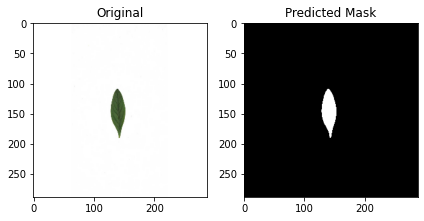

Test file name - ORIGINAL (20).jpg


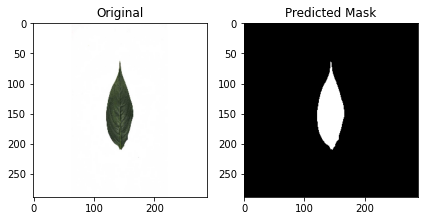

Test file name - ORIGINAL (22).jpg


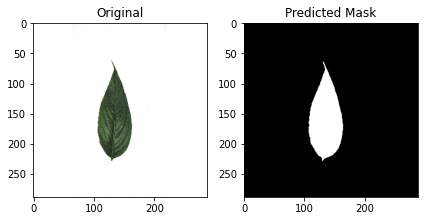

Test file name - ORIGINAL (42).jpg


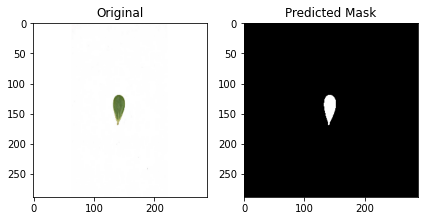

Test file name - ORIGINAL (40).jpg


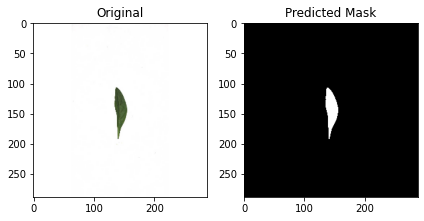

Test file name - ORIGINAL (62).jpg


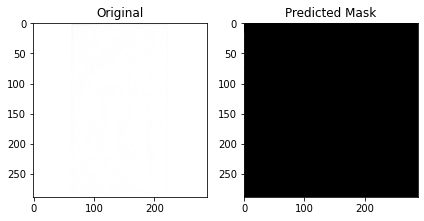

Test file name - ORIGINAL (11).jpg


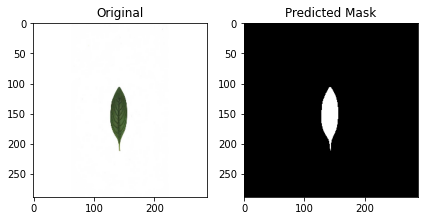

Test file name - ORIGINAL (19).jpg


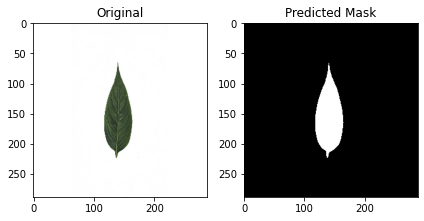

Test file name - ORIGINAL (6).jpg


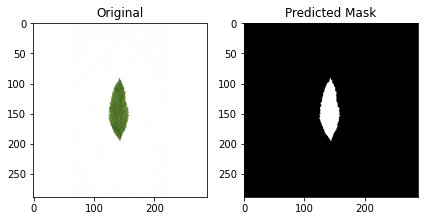

Test file name - ORIGINAL (34).jpg


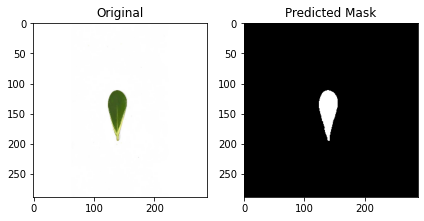

Test file name - ORIGINAL (30).jpg


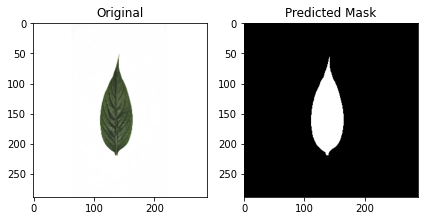

Test file name - ORIGINAL (43).jpg


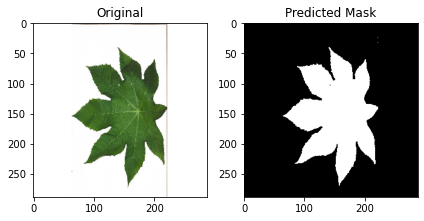

Test file name - ORIGINAL (12).jpg


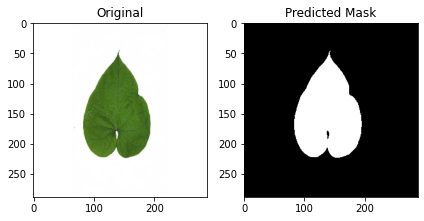

Test file name - ORIGINAL (39).jpg


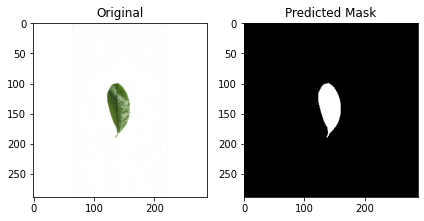

Test file name - ORIGINAL (29).jpg


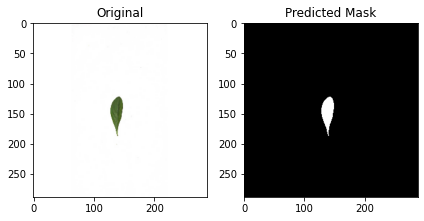

Test file name - ORIGINAL (1).jpg


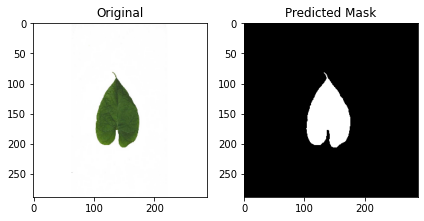

Test file name - ORIGINAL (64).jpg


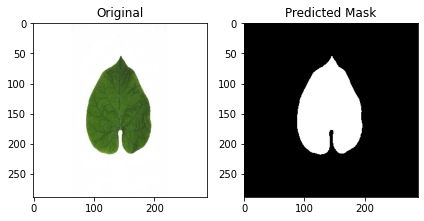

Test file name - ORIGINAL (54).jpg


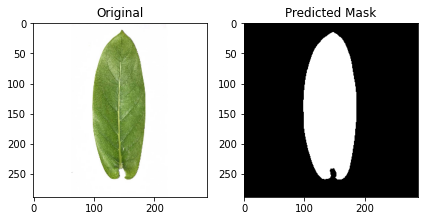

Test file name - ORIGINAL (33).jpg


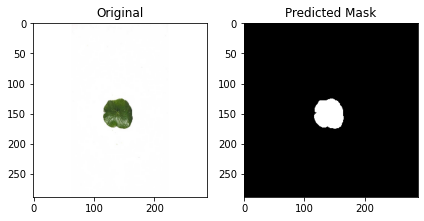

Test file name - ORIGINAL (47).jpg


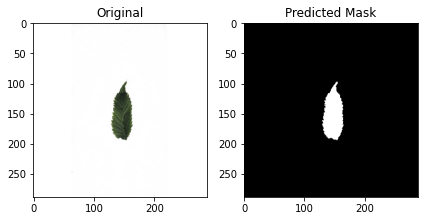

Test file name - ORIGINAL (5).jpg


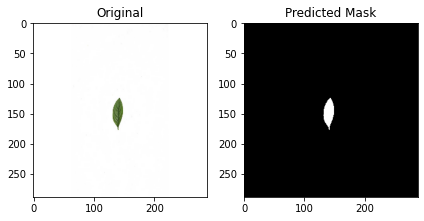

Test file name - ORIGINAL (21).jpg


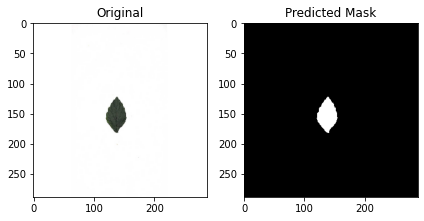

Test file name - ORIGINAL (31).jpg


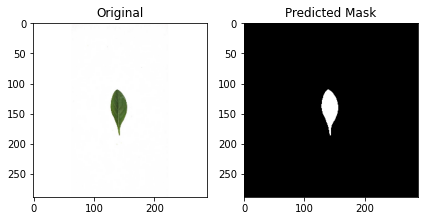

Test file name - ORIGINAL (63).jpg


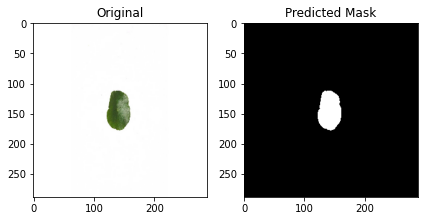

Test file name - ORIGINAL (44).jpg


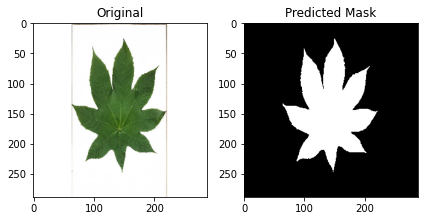

Test file name - ORIGINAL (45).jpg


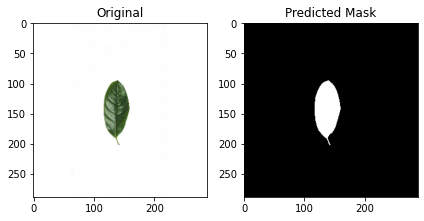

Test file name - ORIGINAL (41).jpg


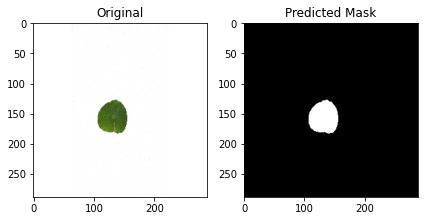

Test file name - ORIGINAL (25).jpg


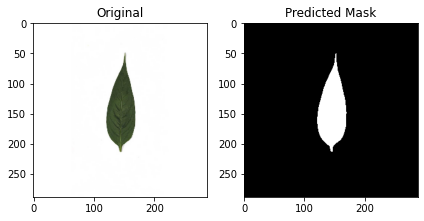

Test file name - ORIGINAL (50).jpg


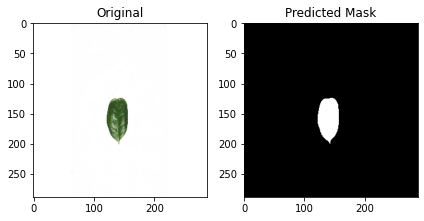

Test file name - ORIGINAL (53).jpg


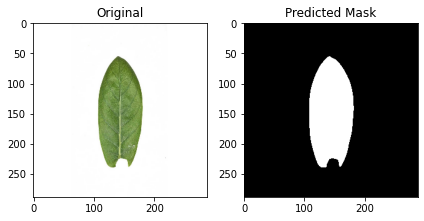

Test file name - ORIGINAL (14).jpg


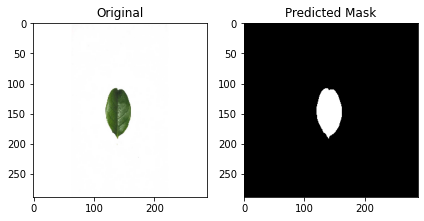

Test file name - ORIGINAL (49).jpg


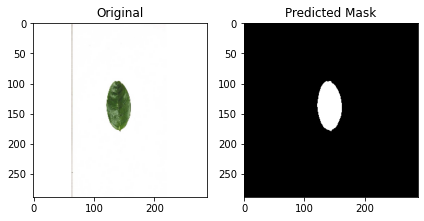

Test file name - ORIGINAL (7).jpg


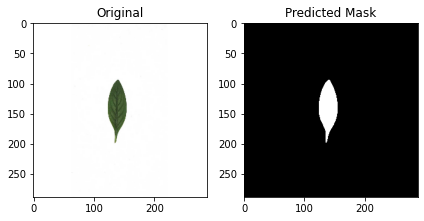

Test file name - ORIGINAL (2).jpg


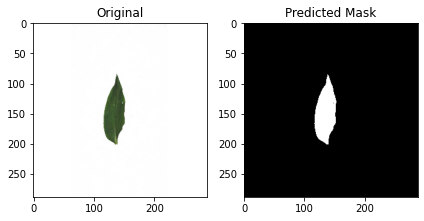

In [6]:
for i in range(len(test_predictions)):
    # making subplots
    print(f'Test file name - {test_files_names[i]}')
    fig, ax = plt.subplots(1, 2)
    # set data with subplots and plot  
    ax[0].imshow(X_test[i])
    ax[0].set_title('Original')    
    grays = rgb2gray(test_predictions[i])
    thresh = threshold_otsu( grays )    
    binary = grays > thresh
    ax[1].imshow(binary, cmap='gray')
    ax[1].set_title('Predicted Mask')
    fig.tight_layout()
    
    path = os.path.join(OUTDIR, 'original', test_files_names[i])
    plt.savefig(path)
    
    plt.show()

In [7]:
colunas = ['Original file name', 'area_em_pixels', 'altura_em_pixels', 'largura_em_pixels','IOU', 'Resolução']
data = []

for i in range(len(train_predictions)):
    
    thresh = threshold_otsu( Y_train[i] )    
    binary = Y_train[i] > thresh
    
    grays = rgb2gray( train_predictions[i] )
    thresh = threshold_otsu( grays )    
    binary_pred = grays > thresh
    
    data.append( [ original_files_names[i] ] + ut.take_area(binary) + [ ut.IOU(binary, binary_pred) ] + [ f'{width} x {height}' ])

In [8]:
df = pd.DataFrame(data=data, columns = colunas)

df.to_csv(f'results/original_gold-k={k}.csv', index=False)
mean = df['IOU'].mean()
print(f'IOU medio - {mean} ')
df

IOU medio - 0.9900660255733544 


,Original file name,area_em_pixels,altura_em_pixels,largura_em_pixels,IOU,Resolução
0,27.jpg,2137,97,28,0.995788,160 x 288
1,24.jpg,182,25,9,0.967033,160 x 288
2,11.jpg,1296,70,31,0.980974,160 x 288
3,07.jpg,1770,128,23,0.982623,160 x 288
4,34.jpg,2514,109,36,0.996027,160 x 288
5,33.jpg,2289,98,36,0.996505,160 x 288
6,41.jpg,4009,118,95,0.997758,160 x 288
7,43.jpg,4866,128,96,0.994872,160 x 288
8,06.jpg,1761,91,27,0.993197,160 x 288
9,01.jpg,5590,141,57,0.990064,160 x 288


In [9]:
colunas = ['Original file name', 'area_em_pixels_predita', 'altura_em_pixels_predita', 'largura_em_pixels_predita', 'Resolução']
data = []

for i in range(len(test_predictions)):
   
    grays = rgb2gray( test_predictions[i] )
    thresh = threshold_otsu( grays )    
    binary_pred = grays > thresh
    
    data.append( [ test_files_names[i] ] + ut.take_area(binary_pred) + [ f'{width} x {height}' ])

In [10]:
df = pd.DataFrame(data=data, columns = colunas)

df.to_csv(f'results/original-k-{k}.csv', index=False)
df

,Original file name,area_em_pixels_predita,altura_em_pixels_predita,largura_em_pixels_predita,Resolução
0,ORIGINAL (59).jpg,1511,87,26,160 x 288
1,ORIGINAL (58).jpg,1477,82,30,160 x 288
2,ORIGINAL (38).jpg,1447,46,40,160 x 288
3,ORIGINAL (18).jpg,5594,160,55,160 x 288
4,ORIGINAL (65).jpg,2692,115,36,160 x 288
...,...,...,...,...,...
61,ORIGINAL (53).jpg,10554,183,73,160 x 288
62,ORIGINAL (14).jpg,2534,82,41,160 x 288
63,ORIGINAL (49).jpg,2540,82,40,160 x 288
64,ORIGINAL (7).jpg,2024,103,30,160 x 288
